# Telecom Churn Case Study

In [128]:
# importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import IncrementalPCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [129]:
#reading the teclecom dataset
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [130]:
telecom.shape

(99999, 226)

In [131]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [132]:
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [133]:
#keeping the copy of the dataset
master = telecom.copy()

### Checking the missing values

In [134]:
#checking the null values
telecom.isnull().sum()/len(telecom.index)*100

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

### Handling the missing values

In data recharge columns the min value is 1 and for few it is missing so we can impute zero,which implies that customer has not done the recharge

- total_rech_data_x
- av_rech_amt_data_x
- max_rech_data_x


where x represents month 6,7,8,9

In [135]:
#imputing nan values with zero
rech_data = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [136]:
telecom[rech_data] = telecom[rech_data].fillna(0)

In [137]:
telecom[rech_data].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
dtype: int64

In [138]:
#droping the columns which are not required for our analysis
drop_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9','mobile_number','circle_id']

telecom.drop(drop_cols,axis=1,inplace=True)

In [139]:
#shape of the dataframe after droping the variables which are not required for our analysis
telecom.shape

(99999, 212)

##### Handling the missing values in the categorical variables

- There are only two levels in the below mentioned categorical variables that is 0 or 1,and there are some large amount for NaN values also present ,so instead of droping them lets impute -1 for those records
- once after checking the number of churn cases with respect to that new category,we can make the decission after taking the inputs from business experts

In [140]:
cat_variable = ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7',
                'fb_user_8','fb_user_9']

In [141]:
telecom[cat_variable] = telecom[cat_variable].fillna(-1)

In [142]:
telecom[cat_variable].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [143]:
#Droping the columns having more than 70% of null values
telecom_null_per = telecom.isnull().sum()/len(telecom.index)*100
df_null = pd.DataFrame({'colms':telecom.columns,'null_per':telecom_null_per}).reset_index(drop=True)
df_null_cols = df_null[df_null['null_per']>70]['colms'].values

telecom = telecom.drop(df_null_cols,axis=1)

In [144]:
telecom.shape

(99999, 196)

In [145]:
#there are still many columns with null values between 3 to 7% lets handle them
test = pd.DataFrame(round(telecom.isnull().sum()/len(telecom.index)*100,2))
len(test[test[0]>0])

119

#####  Iterative Imputer  - MICE(Multivariate imputing by chained equation) using Sklearn
There are 119 columns with the null values between 3 to 7% if we drop them we may lose significant information hence,
lets impute them smartly using the IterativeImputer from sklearn

In [146]:
#imputing the missing values smartly
telecom_cols = telecom.columns
iter_im = IterativeImputer(max_iter = 10,random_state=42)
telecom_imputed = iter_im.fit_transform(telecom)

In [147]:
telecom_imputed = pd.DataFrame(telecom_imputed,columns=telecom_cols)

In [148]:
round(telecom_imputed.isnull().sum()/len(telecom.index),2)

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

##### Lets Derive the features from the existing features

In [149]:
#calculate the total recharge amount for data for the 6th and 7th month
telecom_imputed['total_data_amt_6']  = telecom_imputed['total_rech_data_6'] * telecom_imputed['av_rech_amt_data_6']
telecom_imputed['total_data_amt_7']  = telecom_imputed['total_rech_data_7'] * telecom_imputed['av_rech_amt_data_7']

In [150]:
#Lets calculate the total recharge amount in the month including data recharge
telecom_imputed['overall_recharge_6'] = telecom_imputed['total_rech_amt_6'] + telecom_imputed['total_data_amt_6']
telecom_imputed['overall_recharge_7'] = telecom_imputed['total_rech_amt_7'] + telecom_imputed['total_data_amt_7']

In [151]:
#lets find derive the feature by taking the average of the rechage in the month of 6 and 7
telecom_imputed['overall_recharge_avg']  = (telecom_imputed['overall_recharge_6']+telecom_imputed['overall_recharge_7'])/2

##### Considering only high value customers - having overall recharge amount greater than or equal to 70 percentile after combining 6th and 7th month

In [152]:
#finding the 70th percientile of the over all recharge
telecom_imputed['overall_recharge_avg'].quantile(0.7)

478.0

In [153]:
#filtering the high value customers based on the 70th percentile value
telecom_hvc = telecom_imputed[telecom_imputed['overall_recharge_avg']>=telecom_imputed['overall_recharge_avg'].quantile(0.7)]

In [154]:
#droping all the feature which are derived to find out the high value customers
telecom_hvc = telecom_hvc.drop(['total_data_amt_6','total_data_amt_7','overall_recharge_6','overall_recharge_7',
                        'overall_recharge_avg'],axis=1)

In [155]:
telecom_hvc.shape

(30001, 196)

##### Assigning the class 0  or 1 based on the 9th months incomming , outgoing calls and internet usage

In [156]:
#Adding the incomming and outgoing calls 
telecom_hvc['overall_call_9'] = telecom_hvc['total_ic_mou_9']+telecom['total_og_mou_9']

In [157]:
#calculating the total data usge in the 9th month
telecom_hvc['overall_data_9'] = telecom_hvc['vol_2g_mb_9']+telecom['vol_3g_mb_9']

In [158]:
#User define function
def label(churn_label):
    if ((churn_label['overall_call_9']==0) & (churn_label['overall_data_9']==0)):
        return 1
    else:
        return 0

In [159]:
#assigning the labels
telecom_hvc['churn'] = telecom_hvc.apply(label,axis=1)

In [160]:
#droping the derived feature which is not required for further analysis
telecom_hvc = telecom_hvc.drop(['overall_call_9','overall_data_9'],axis=1)

In [161]:
telecom_hvc.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-94.980644,-82.217647,0.00,-107.639562,143.901405,133.468271,0.00,113.515476,28.592357,12.002749,0.00,8.078558,33.254604,12.315767,0.00,1.468989,-99.924542,-117.338261,0.00,-120.140915,93.342027,91.39185,0.00,90.461544,3.745717,3.788863,0.00,3.649188,2.461814,-2.528916,0.00,-0.115050,-2.92257,-22.162328,0.00,-26.029248,30.64271,32.984944,0.00,34.040803,87.301874,90.806428,0.00,86.279301,1.121206,1.112719,0.00,1.035596,0.0,0.0,0.0,0.0,119.053075,124.916394,0.00,121.347766,-120.399522,-107.767069,0.00,-99.751494,3.91036,4.973372,0.00,4.404080,0.442868,0.048201,0.0,0.049508,0.00,0.00,0.00,0.00,-58.904567,-63.902917,0.16,-58.739106,107.47391,107.11725,4.13,106.157473,12.084698,12.601121,1.15,12.172321,60.577042,55.78019,5.44,59.585498,-23.052434,-23.203368,0.00,-22.249847,20.722566,21.656561,0.00,19.620640,2.155512,2.216491,0.00,2.173028,0.0,0.0,0.0,0.0,-0.180027,0.668418,0.00,-0.455884,0.00,0.00,5.44,0.00,-67.59625,-64.485108,0.0,-67.995463,7.070671,7.405645,0.00,8.015054,0.853447,1.01219,0.00,1.016982,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,

- There are only 8% of data points which belongs to churn class
- Data what we have is imbalanced
- out of 30000 data points only 2441 are churned data and 27560 is non-churn data

In [162]:
telecom_hvc['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [163]:
telecom_hvc['churn'].value_counts(normalize=True)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

### Droping the cloumns where there is no variance (no unique values)

In [164]:
#checking for the columns where there is no variance and droping them
for i in telecom_hvc.columns:
    if telecom_hvc[i].nunique() == 1:
        telecom_hvc.drop(i,axis=1,inplace = True)

### droping the 9th month features

In [165]:
#droping the columns of 9th month after setting the the class 0 or 1
cols_drop = [col for col in telecom_hvc.columns if '_9' in col]
telecom_hvc.drop(cols_drop,axis=1,inplace=True)

### Derived features

- since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.
- Lets take the the avg of 6th,7th month for some important features and find the difference between 8th month,by doing so we can observe the behaviour of the customer in terms of usage

In [166]:
#derived features for total incomming and outgoing calls
telecom_hvc['total_og_mou_diff']=telecom_hvc['total_og_mou_8']-((telecom_hvc['total_og_mou_6']+telecom_hvc['total_og_mou_7'])/2)
telecom_hvc['total_ic_mou_diff']=telecom_hvc['total_ic_mou_8']-((telecom_hvc['total_ic_mou_6']+telecom_hvc['total_ic_mou_7'])/2)

In [167]:
#derived feature for total recharge amount
telecom_hvc['total_rech_amt_diff']=telecom_hvc['total_rech_amt_8']-((telecom_hvc['total_rech_amt_6']+telecom_hvc['total_rech_amt_7'])/2)

In [168]:
#derived features for romaing calls
telecom_hvc['roam_ic_mou_diff']=telecom_hvc['roam_ic_mou_8']-((telecom_hvc['roam_ic_mou_6']+telecom_hvc['roam_ic_mou_7'])/2)
telecom_hvc['roam_og_mou_diff']=telecom_hvc['roam_og_mou_8']-((telecom_hvc['roam_og_mou_6']+telecom_hvc['roam_og_mou_7'])/2)

In [169]:
#derived features for data consumption
telecom_hvc['vol_2g_mb_diff'] = telecom_hvc['vol_2g_mb_8'] - ((telecom_hvc['vol_2g_mb_6'] + telecom_hvc['vol_2g_mb_7'])/2)
telecom_hvc['vol_3g_mb_diff'] = telecom_hvc['vol_3g_mb_8'] - ((telecom_hvc['vol_3g_mb_6'] + telecom_hvc['vol_3g_mb_7'])/2)

### grouping categorical and numerical columns

In [170]:
#grouping categorical and numerical columns
col_month_9 = [col for col in telecom.columns if '_9' in col]
cat_cols = [col for col in cat_variable if col not in col_month_9]
#cat_cols.append('churn')
target = ['churn']
numeric_cols = [col for col in telecom_hvc.columns if col not in cat_cols + target]

# Exploratory Data Analysis - EDA

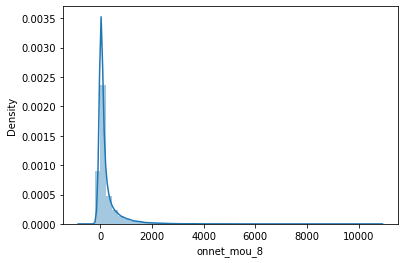

In [171]:
#univariate analysis
sns.distplot(telecom_hvc['onnet_mou_8'])
plt.show()

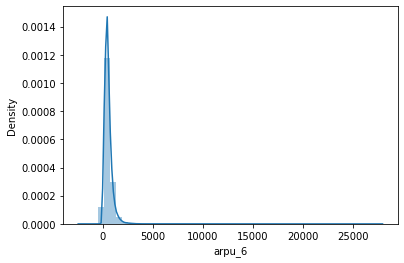

In [172]:
sns.distplot(telecom_hvc['arpu_6'])
plt.show()

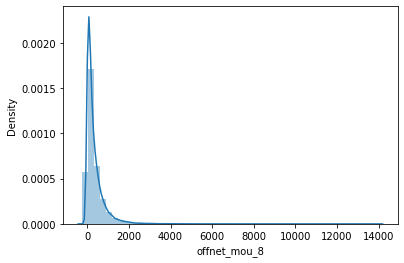

In [173]:
sns.distplot(telecom_hvc['offnet_mou_8'])
plt.show()

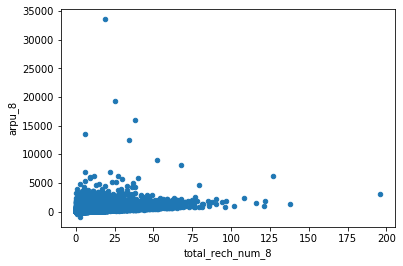

In [174]:
telecom_hvc[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',y='arpu_8')
plt.show()

In [175]:
#Lets create the box plot for june,july and august months
def box_plot(variable):
    plt.figure(figsize=(20,16))
    df = telecom_hvc
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=variable+'_6',x='churn',hue='churn',
                showfliers=False,palette=('rainbow'))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=variable+'_7',x='churn',hue='churn',
                showfliers=False,palette=('rainbow'))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=variable+'_8',x='churn',hue='churn',
                showfliers=False,palette=('rainbow'))
    plt.show()

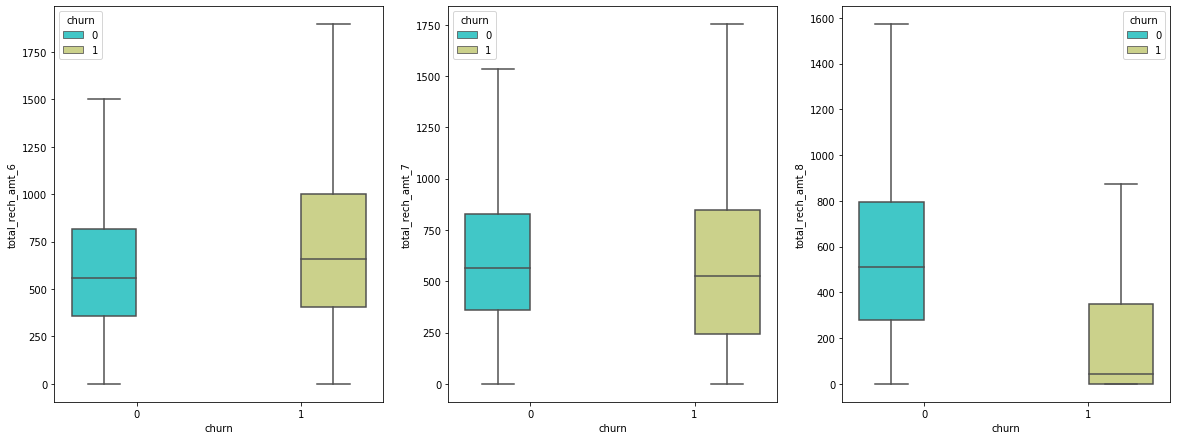

In [176]:
#lets plot total_rech_amt vs churn in 6th,7th,8th month
box_plot('total_rech_amt')

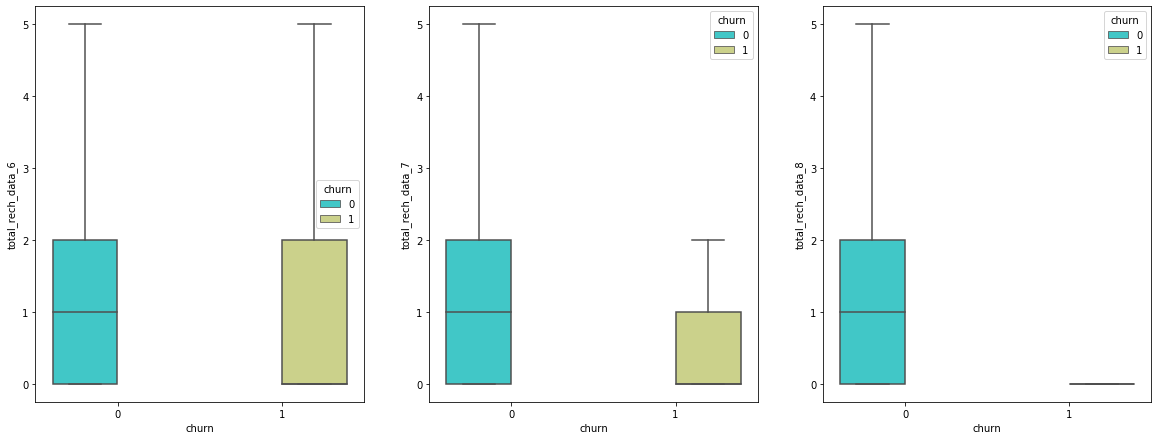

In [177]:
#lets plot total_rech_data vs churn in 6th,7th,8th month
box_plot('total_rech_data')

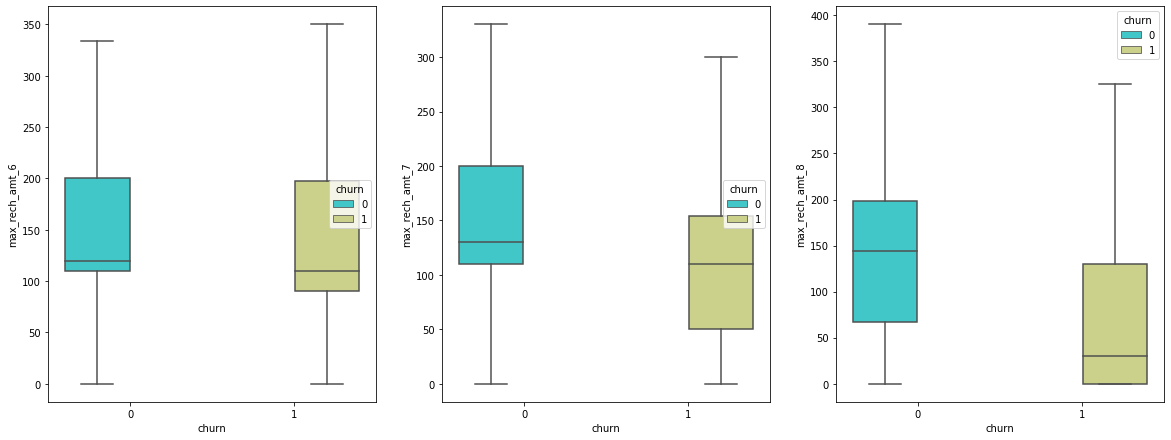

In [178]:
#lets plot max_rech_amt vs churn in 6th,7th,8th month
box_plot('max_rech_amt')

 - we can clearly see from the above box plots that total recharge amount is decreaing from month to month in case of churn,and in case on non churn it is some what constant

In [179]:
#lets create the bar plot for mean values of different features - 6th,7th,8th month
def bar_plot_mean(df,columns_list):
    df_non_churn = df[df.churn==0].filter(columns_list)
    df_churn = df[df.churn==1].filter(columns_list)

    mean_df_nch = pd.DataFrame([df_non_churn.mean()],index={'Non Churn'})
    mean_df_ch = pd.DataFrame([df_churn.mean()],index={'Churn'})

    merge = [mean_df_nch, mean_df_ch]
    mean_val = pd.concat(merge)

    mean_val.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_val

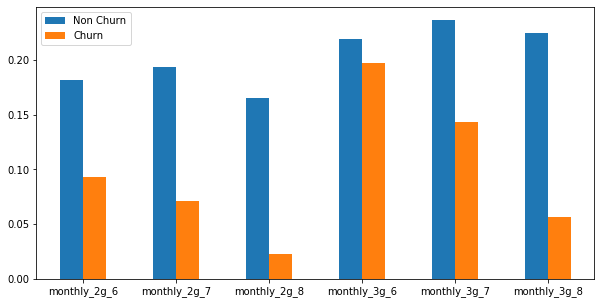

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.181676,0.193215,0.165203,0.219557,0.236575,0.224673
Churn,0.093404,0.070873,0.022941,0.197460,0.143794,0.056944


In [180]:
#usage of 2g and 3g data
data_2g_3g = telecom_hvc.columns[telecom_hvc.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
bar_plot_mean(telecom_hvc, data_2g_3g)

- data consumption by the user also reducing from month to month,for churn cases

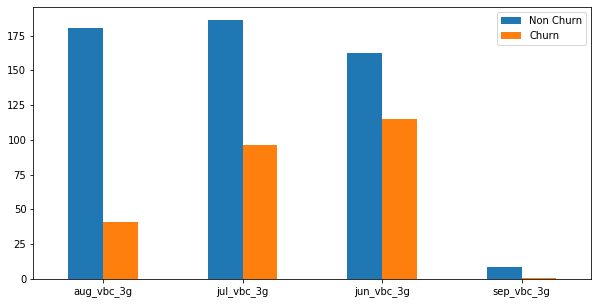

,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
Non Churn,180.501280,186.206078,162.370343,8.712424
Churn,40.851975,96.076317,115.096575,0.322519


In [181]:
#volume based cost for 3g data
volume_based_cost_3g = telecom_hvc.columns[telecom_hvc.columns.str.contains('vbc_3g',regex=True)]
bar_plot_mean(telecom_hvc, volume_based_cost_3g)

- volume based cost for 3g data is also reducing

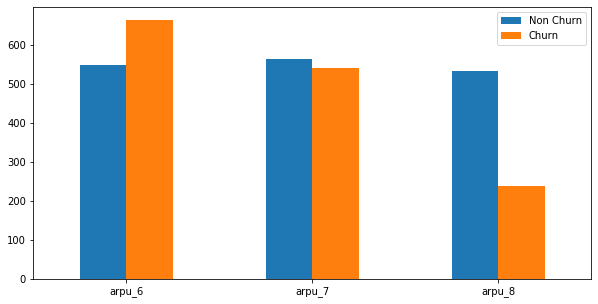

,arpu_6,arpu_7,arpu_8
Non Churn,549.220390,562.608191,532.635710
Churn,663.158246,540.165968,237.200793


In [182]:
#average revenue per user
arpu_months = telecom_hvc.columns[telecom_hvc.columns.str.contains('arpu_',regex=True)]
bar_plot_mean(telecom_hvc, arpu_months)

- Average revenue per user is also decreasing along the months from 6th to 8th

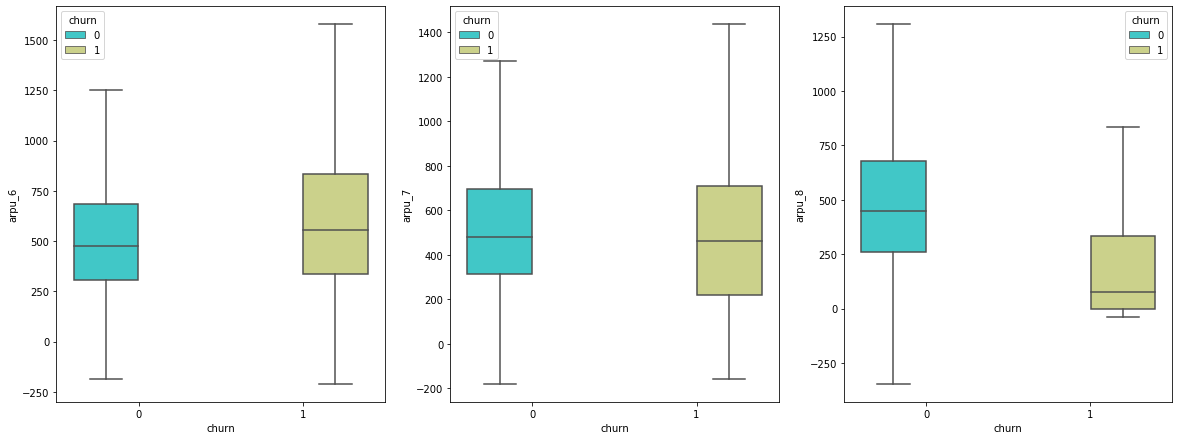

In [183]:
box_plot('arpu')

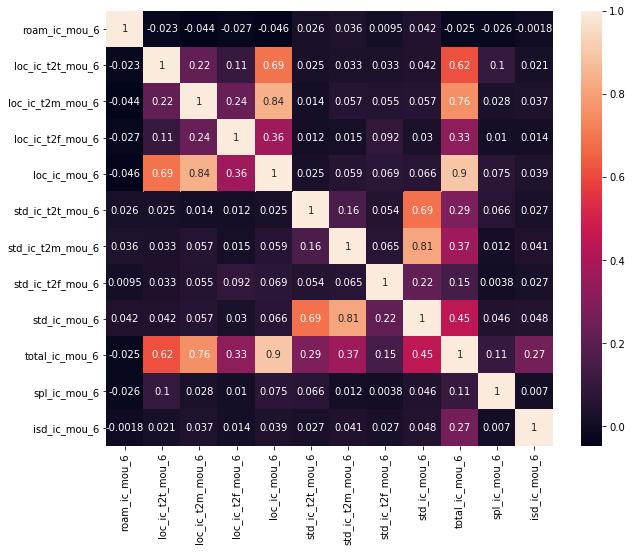

In [184]:
#cheching the corelation betwwen all kind of incomming calls
plt.figure(figsize=(10,8))
ic_calls_month6 = telecom_hvc.columns[telecom_hvc.columns.str.contains('.*_ic_.*mou_6',regex=True)]
sns.heatmap(telecom_hvc[ic_calls_month6].corr(),annot=True)
plt.show()

- from the above corelation matrix we clearly say that most of the incommings calls are from different network

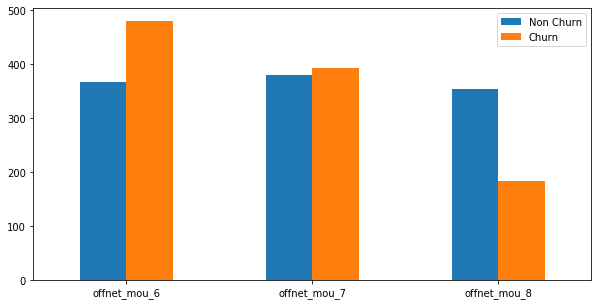

,offnet_mou_6,offnet_mou_7,offnet_mou_8
Non Churn,367.092362,379.384774,354.419822
Churn,480.251532,393.167213,183.177648


In [185]:
#offnet usage of the customer
offnet_usage = telecom_hvc.columns[telecom_hvc.columns.str.contains('offnet.*mou',regex=True)]
bar_plot_mean(telecom_hvc, offnet_usage)

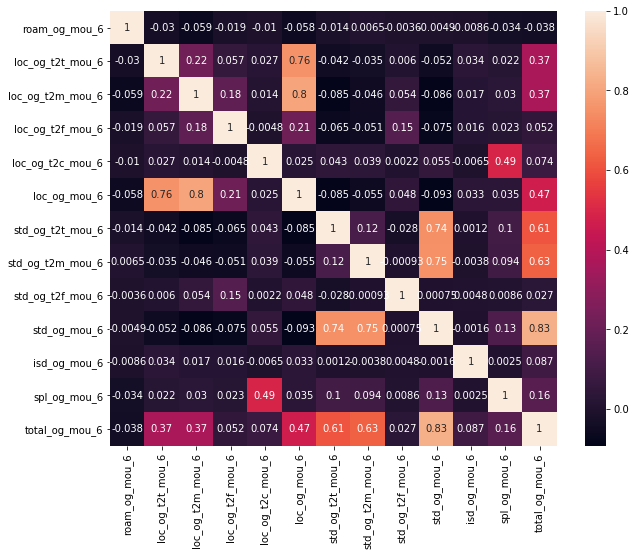

In [186]:
#cheching the corelation betwwen all kind of outgoing calls
plt.figure(figsize=(10,8))
og_calls_month6 = telecom_hvc.columns[telecom_hvc.columns.str.contains('.*_og_.*mou_6',regex=True)]
sns.heatmap(telecom_hvc[og_calls_month6].corr(),annot=True)
plt.show()

- from the above corelation matrix we clearly say that most of the outgoing calls are to different network

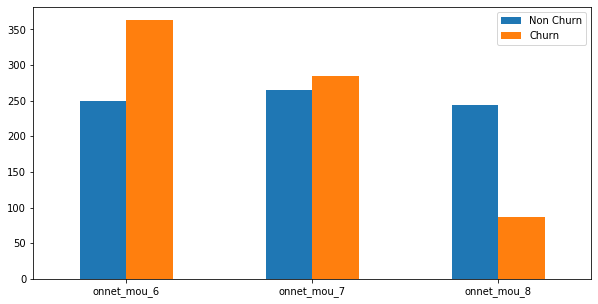

,onnet_mou_6,onnet_mou_7,onnet_mou_8
Non Churn,249.858046,264.676581,243.704758
Churn,363.223804,285.004778,86.879369


In [187]:
#onnet usage of the customer
onnet_usage =  telecom_hvc.columns[telecom_hvc.columns.str.contains('^onnet.*mou',regex=True)]
bar_plot_mean(telecom_hvc, onnet_usage)

### Lets plot the graph to find from how long the customers are with network

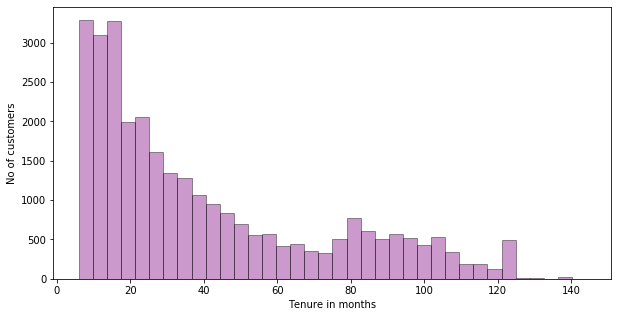

In [188]:
plt.figure(figsize=(10,5))
tenure_data = telecom_hvc[['aon','churn']]
tenure_data['tenure'] = tenure_data['aon']/30
ax = sns.distplot(tenure_data['tenure'],hist=True,kde=False,bins=int(180/5),color='purple',
            hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':5})
ax.set_xlabel('Tenure in months')
ax.set_ylabel('No of customers')
plt.show()

In [189]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)

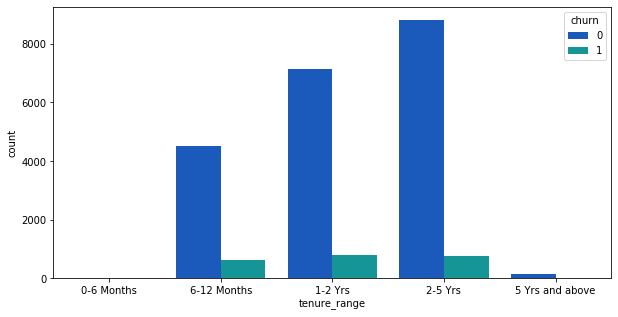

In [190]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=('winter'))
plt.show()

In [191]:
telecom_hvc.shape

(30001, 148)

### handling the categorical variable

In [192]:
#creating the dummy variables for categorical variables
telecom_hvc = pd.get_dummies(data = telecom_hvc,columns = cat_cols,drop_first=True)

In [193]:
#keeping the backup of the data
telecom_hvc1 = telecom_hvc.copy()

In [194]:
telecom_hvc1['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

##### Handling the outliers with the help of capping method

- with the help of capping we can handle the outliers for certain extent without loasing any data

In [195]:
#user define function for capping the outliers
def capping(col, k=3):
    upper_band = col.mean() + k*col.std()
    lower_band = col.mean() - k*col.std()
    col[col<lower_band] = lower_band
    col[col>upper_band] = upper_band
    return col
telecom_hvc1[numeric_cols] =telecom_hvc1[numeric_cols].apply(capping, axis=0)

In [196]:
telecom_hvc1['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [197]:
telecom_hvc1.shape

(30001, 154)

In [198]:
telecom_hvc1['churn'] = telecom_hvc1['churn'].astype('int')

In [199]:
telecom_hvc1['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

### Model Building

In [200]:
#splitting the data into train and test
X = telecom_hvc1.drop('churn',axis=1)
y = telecom_hvc1['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.75,test_size = 0.25,random_state = 100,stratify = y)

In [201]:
print(X_train.shape)
print(X_test.shape)

(22500, 153)
(7501, 153)


In [202]:
#Scaling the data
X_cols = X_train.columns
Scaler = StandardScaler()

X_train_scale = Scaler.fit_transform(X_train)
X_train_scale = pd.DataFrame(X_train,columns=X_cols)

X_test_scale = Scaler.transform(X_test)
X_test_scale = pd.DataFrame(X_test,columns=X_cols)

##### Principal component analysis (PCA)

In [203]:
#fitting the PCA for train dataset
pca = PCA(random_state=42)
pca.fit(X_train_scale)

PCA(random_state=42)

In [204]:
pca.components_

array([[ 1.21799431e-01,  1.44320159e-01,  1.35596551e-01, ...,
        -1.53854892e-04,  2.61787935e-05, -1.30194703e-04],
       [ 1.09091528e-01,  1.45643611e-01,  1.90635189e-01, ...,
         1.14700923e-04, -1.03071846e-05,  1.42805679e-04],
       [ 6.00256587e-03,  2.71840544e-02,  1.39594166e-02, ...,
         1.09954610e-04, -1.54334693e-05,  1.03093425e-04],
       ...,
       [ 0.00000000e+00, -6.92463758e-19,  3.01458108e-19, ...,
         3.55211154e-01, -3.36722743e-01, -3.36722743e-01],
       [ 0.00000000e+00, -1.05847831e-19,  4.74503937e-19, ...,
         1.08173909e-01,  2.42661236e-01,  2.42661236e-01],
       [-0.00000000e+00, -1.77769918e-18, -6.75937006e-19, ...,
         3.34848386e-01,  2.78806957e-01,  2.78806957e-01]])

In [205]:
pca.explained_variance_ratio_

array([2.82769008e-01, 1.45147113e-01, 1.22100114e-01, 7.40892868e-02,
       7.13537891e-02, 5.26140705e-02, 4.06569943e-02, 2.70557069e-02,
       2.61780659e-02, 2.13762467e-02, 1.51445793e-02, 1.40216900e-02,
       1.13276911e-02, 1.08973660e-02, 7.84842285e-03, 7.65843904e-03,
       6.63298918e-03, 6.31202318e-03, 5.74150563e-03, 3.98129452e-03,
       3.64115511e-03, 3.43617682e-03, 3.27878852e-03, 2.78844941e-03,
       2.70466915e-03, 2.18695611e-03, 1.95777518e-03, 1.91917118e-03,
       1.77926171e-03, 1.73700316e-03, 1.57725323e-03, 1.48765117e-03,
       1.32827301e-03, 1.15506122e-03, 1.04640328e-03, 9.71824106e-04,
       8.68973319e-04, 7.83401269e-04, 7.62234066e-04, 6.94815591e-04,
       6.69346664e-04, 5.97182153e-04, 5.80791630e-04, 5.67241389e-04,
       5.51921762e-04, 5.28925976e-04, 5.05323071e-04, 4.72176844e-04,
       4.14676205e-04, 4.07745545e-04, 3.92606130e-04, 3.75200067e-04,
       3.31636380e-04, 3.16955852e-04, 2.97642653e-04, 2.95404384e-04,
      

In [206]:
var_cumsum = np.cumsum(pca.explained_variance_ratio_)

In [207]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       28.28
1       42.79
2       55.00
3       62.41
4       69.55
5       74.81
6       78.87
7       81.58
8       84.20
9       86.33
10      87.85
11      89.25
12      90.38
13      91.47
14      92.26
15      93.02
16      93.69
17      94.32
18      94.89
19      95.29
20      95.65
21      96.00
22      96.33
23      96.61
24      96.88
25      97.09
26      97.29
27      97.48
28      97.66
29      97.83
30      97.99
31      98.14
32      98.27
33      98.39
34      98.49
35      98.59
36      98.68
37      98.76
38      98.83
39      98.90
40      98.97
41      99.03
42      99.09
43      99.14
44      99.20
45      99.25
46      99.30
47      99.35
48      99.39
49      99.43
50      99.47
51      99.51
52      99.54
53      99.57
54      99.60
55      99.63
56      99.66
57      99.68
58      99.71
59      99.73
60      99.75
61      99.76
62      99.78
63      99.80
64      99.81
65      99.82
66      99.84
67      99.85
68      99.86
69      99.87
70      99.88
71    

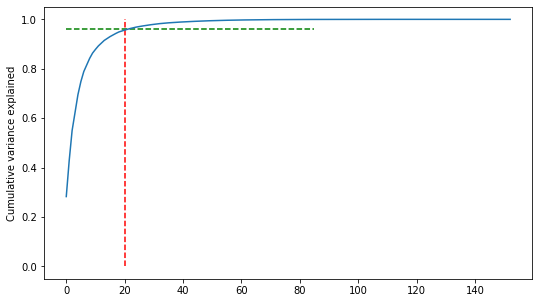

In [208]:
plt.figure(figsize=(175/20,100/20))
plt.vlines(x=20, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.96, xmax=85, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumsum)
plt.ylabel("Cumulative variance explained")
plt.show()

- if we select 20 components,96% variance can be covered

In [209]:
pca_inc = IncrementalPCA(n_components=20)
pca_X_train = pca_inc.fit_transform(X_train_scale)
pca_X_train.shape

(22500, 20)

In [210]:
corrmat = np.corrcoef(pca_X_train.transpose())
corrmat.shape

(20, 20)

In [211]:
#PCA on the test data
pca_X_test = pca_inc.transform(X_test_scale)
pca_X_test.shape

(7501, 20)

### LogisticRegression with balanced weight

- we are using weight as blanced while building the model,and the reason for taking the weights - imbalanced data

In [212]:
y_train.value_counts()

0    20669
1     1831
Name: churn, dtype: int64

In [213]:
y_test.value_counts()

0    6891
1     610
Name: churn, dtype: int64

### Model fitting - LogisticRegression

In [214]:
#fitting the logisticregression model
log_pca = LogisticRegression(class_weight='balanced')
log_pca = log_pca.fit(pca_X_train,y_train)

##### Model evalution on train data

In [215]:
y_train_pred = log_pca.predict(pca_X_train)
y_train_pred_proba = log_pca.predict_proba(pca_X_train)

In [216]:
#Train accuracy
accuracy_score(y_train,y_train_pred)

0.8048444444444445

#### Model evalution on test data

In [217]:
y_test_pred = log_pca.predict(pca_X_test)
y_test_pred_proba = log_pca.predict_proba(pca_X_test)

In [218]:
confusion_matrix(y_test,y_test_pred)

array([[5492, 1399],
       [ 105,  505]], dtype=int64)

In [219]:
sensitivity, specificity,_ = sensitivity_specificity_support(y_test,y_test_pred, average='binary')
auc = roc_auc_score(y_test,y_test_pred_proba[:,1])
print('Sensitivity: \t', round(sensitivity, 2), '\n', 'Specificity: \t', round(specificity, 2), sep='')
print('Accuracy: \t',(accuracy_score(y_test,y_test_pred)))
print('AUC:    \t', round(auc,2))

Sensitivity: 	0.83
Specificity: 	0.8
Accuracy: 	 0.7994934008798826
AUC:    	 0.88


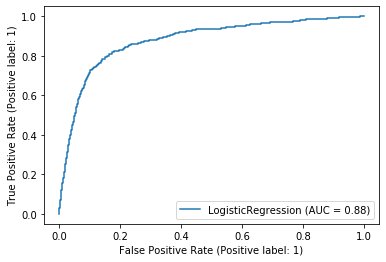

In [220]:
plot_roc_curve(log_pca,pca_X_test,y_test)

In [221]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      6891
           1       0.27      0.83      0.40       610

    accuracy                           0.80      7501
   macro avg       0.62      0.81      0.64      7501
weighted avg       0.92      0.80      0.84      7501



### RandomForest

In [222]:
#lets build the model using RandomForest
rfc = RandomForestClassifier(class_weight={0:0.1,1:0.9},n_jobs=-1,random_state=42)

### hyperparameter tuning using GridSearchCV

In [223]:
#hyperparameter tuning using gridsearchcross validation
folds=5

params = {'criterion':['gini','entropy'],'max_features':['auto',0.5],'max_depth':range(2,20,5)}

model = GridSearchCV(estimator=rfc,
                     cv=folds,
                     param_grid=params,
                     scoring='roc_auc',
                     n_jobs=-1,
                     verbose=-1,
                     return_train_score=True)
model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 5),
                         'max_features': ['auto', 0.5]},
             return_train_score=True, scoring='roc_auc', verbose=-1)

In [224]:
model.best_score_

0.9327219900147853

In [225]:
rfc_best = model.best_estimator_
rfc_best

RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
                       max_depth=12, max_features=0.5, n_jobs=-1,
                       random_state=42)

In [226]:
y_train_pred = rfc_best.predict(X_train)
y_train_pred_proba = rfc_best.predict_proba(X_train)
auc = accuracy_score(y_train,y_train_pred)

print('model accuracy on train data: \t',round(auc,2))

model accuracy on train data: 	 0.98


### Model evaluation on test data

In [227]:
y_test_pred = rfc_best.predict(X_test)
y_test_pred_proba = rfc_best.predict_proba(X_test)
auc = accuracy_score(y_test,y_test_pred)

print('model accuracy on test data: \t',round(auc,2))

model accuracy on test data: 	 0.94


In [228]:
confusion_matrix(y_test,y_test_pred)

array([[6672,  219],
       [ 231,  379]], dtype=int64)

In [229]:
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
auc = roc_auc_score(y_test,y_test_pred_proba[:,1])
print('model sensitivity : \t',round(sensitivity,2))
print('model specificity : \t',round(specificity,2))
print('Area under curve : \t',round(auc,2))


model sensitivity : 	 0.62
model specificity : 	 0.97
Area under curve : 	 0.93


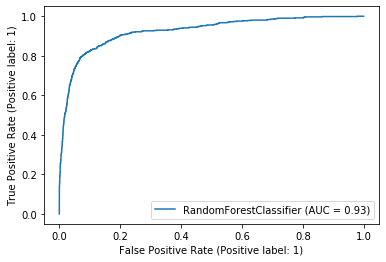

In [230]:
plot_roc_curve(rfc_best,X_test,y_test)

- sensitivity is very less 0.62 in RandomForest

- hence LogisticRegression along with PCA is the best model 

##### Identifing the best Predictors by fitting the RandomForest Model again with different parameters

In [231]:
#number of features to consider at each split
num_features = int(round(np.sqrt(X_train.shape[1])))


#fitting the RandomForest model again with different features to find the best predictors
rfc1 = RandomForestClassifier(class_weight={0:0.1,1:0.9},
                    n_estimators=100,
                    oob_score=True,
                    max_features = num_features,
                    random_state=4,
                    verbose=1,)

rfc1.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.0s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=12,
                       oob_score=True, random_state=4, verbose=1)

### Model evaluation

In [232]:
y_test_pred = rfc1.predict(X_test)
y_test_pred_proba = rfc1.predict_proba(X_test)
auc = accuracy_score(y_test,y_test_pred)

print('model accuracy on test data: \t',round(auc,2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


model accuracy on test data: 	 0.94


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [233]:
confusion_matrix(y_test,y_test_pred)

array([[6798,   93],
       [ 349,  261]], dtype=int64)

In [234]:
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_test_pred, average='binary')
auc = roc_auc_score(y_test,y_test_pred_proba[:,1])
print('model sensitivity : \t',round(sensitivity,2))
print('model specificity : \t',round(specificity,2))
print('Area under curve : \t',round(auc,2))

model sensitivity : 	 0.43
model specificity : 	 0.99
Area under curve : 	 0.92


In [235]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6891
           1       0.74      0.43      0.54       610

    accuracy                           0.94      7501
   macro avg       0.84      0.71      0.76      7501
weighted avg       0.93      0.94      0.93      7501



### feature importances

In [236]:
features = rfc1.feature_importances_

best_features = pd.DataFrame({'feature':X_cols,'percentage':features*100})

best_features = best_features.sort_values(by='percentage',ascending=False).reset_index(drop=True)
best_features

,feature,percentage
0,roam_og_mou_8,5.544002
1,loc_ic_t2t_mou_8,4.655509
2,total_ic_mou_8,4.373306
3,loc_ic_mou_8,4.159092
4,total_og_mou_8,3.076334
5,roam_ic_mou_8,3.031886
6,loc_og_mou_8,2.954586
7,last_day_rch_amt_8,2.930056
8,loc_ic_t2m_mou_8,2.399813
9,total_rech_amt_8,2.394320


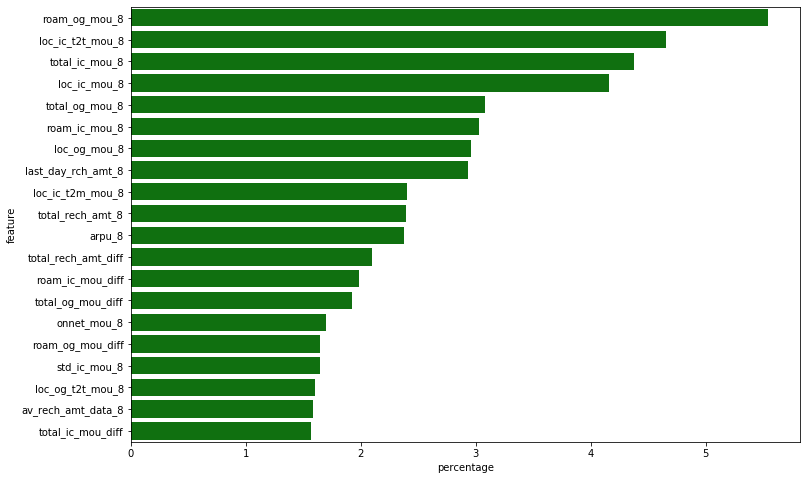

In [237]:
#Top 20 features
plt.figure(figsize=(12,8))
sns.barplot(x='percentage',y='feature',data=best_features[:20],color='g')

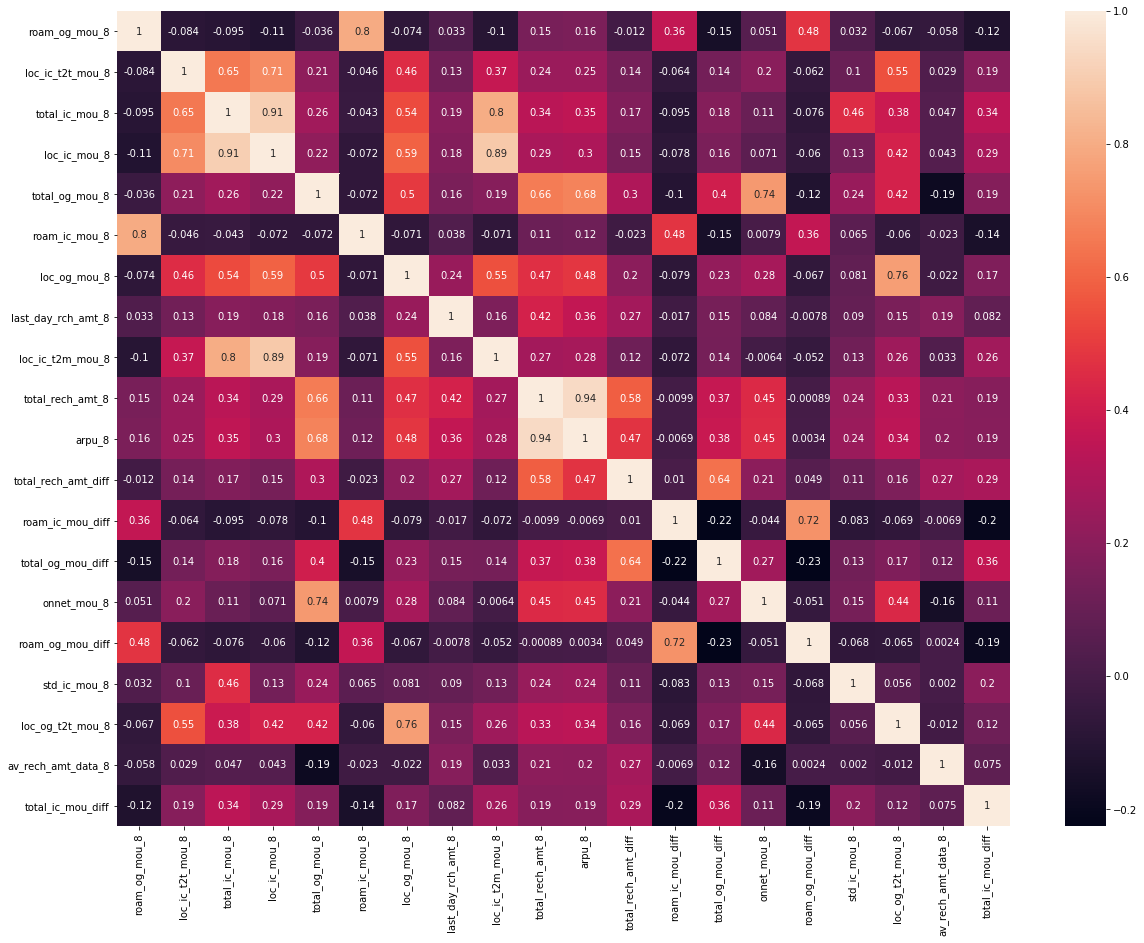

In [238]:
plt.figure(figsize=(20,15))
sns.heatmap(X_train[best_features['feature'][:20]].corr(),annot=True)
plt.show()

In [239]:
#lets pick the important feature with the help of above plot and correlation matrix
important_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8','onnet_mou_8']

### LogisticRegression - Building model again only with top selected features for interpretation purpose

In [240]:
#Lets build the LogisticRegresstion with only important features
X_train_scale_1 = X_train_scale[important_features]
X_test_scale_1 = X_test_scale[important_features]

In [241]:
#fitting the logisticRegression model
logi = LogisticRegression(class_weight={0:0.1, 1:0.9})
                          
folds = 5

params = {'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],'penalty':['l1','l2']}

model = GridSearchCV(estimator=logi,
                     cv=folds,
                     param_grid=params,
                     scoring='roc_auc',
                     n_jobs=-1,
                     verbose=1)

model.fit(X_train_scale_1,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight={0: 0.1, 1: 0.9}),
             n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [242]:
model.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [243]:
#fitting the model with best parameters
logi = LogisticRegression(class_weight={0:0.1, 1:0.9},C=10, penalty='l2')
logi.fit(X_train_scale_1,y_train)

LogisticRegression(C=10, class_weight={0: 0.1, 1: 0.9})

In [244]:
y_train_pred = logi.predict(X_train_scale_1)
y_train_pred_proba = logi.predict_proba(X_train_scale_1)
print('accuracy of the model on train data: \t',round(accuracy_score(y_train,y_train_pred),2))
print('area under the cure: \t',round(model.best_score_,2))

accuracy of the model on train data: 	 0.85
area under the cure: 	 0.89


### Model evaluation on test data

In [245]:
### Model evaluation on test data
y_test_pred = model.predict(X_test_scale_1)
y_test_pred_proba = model.predict_proba(X_test_scale_1)

In [246]:
print('accuracy of the model on test data: \t',round(accuracy_score(y_test,y_test_pred),2))
print('area under the cure: \t',round(roc_auc_score(y_test,y_test_pred_proba[:,1]),2))

accuracy of the model on test data: 	 0.84
area under the cure: 	 0.87


In [247]:
#confusion matrix
confusion_matrix(y_test,y_test_pred)

array([[5828, 1063],
       [ 143,  467]], dtype=int64)

In [248]:
sensitivity,specificity, _ = sensitivity_specificity_support(y_test,y_test_pred,average='binary')
print('sensitivity: \t',round(sensitivity,2), "\n", 'specificity: \t', round(specificity,2), sep='')

sensitivity: 	0.77
specificity: 	0.85


In [249]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      6891
           1       0.31      0.77      0.44       610

    accuracy                           0.84      7501
   macro avg       0.64      0.81      0.67      7501
weighted avg       0.92      0.84      0.87      7501



### conclusion

In [250]:
logi.intercept_

array([0.07317737])

In [251]:
inter_df = pd.DataFrame({'features':important_features,'coefficients':logi.coef_.flatten()})
inter_df

,features,coefficients
0,total_ic_mou_8,-0.002388
1,total_rech_amt_diff,-0.002027
2,total_og_mou_8,-0.003497
3,arpu_8,0.000503
4,roam_ic_mou_8,0.000181
5,roam_og_mou_8,0.006848
6,std_ic_mou_8,0.000197
7,av_rech_amt_data_8,-0.005000
8,std_og_mou_8,0.003359
9,onnet_mou_8,-0.000499


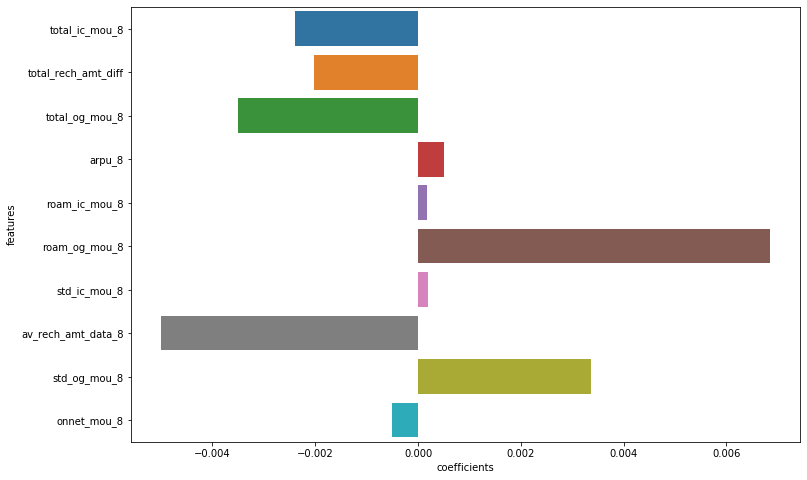

In [252]:
#Top 20 features
plt.figure(figsize=(12,8))
sns.barplot(x='coefficients',y='features',data=inter_df)

### For the give data set, LogisticRegression along with pca is the best model for predicting the churn case

Metrics of the models is mentioned below

1) LogisticRegression along with pca

- Sensitivity: 0.83
- Specificity: 0.8
- Accuracy: 0.8
- AUC: 0.88

2) RandomForest 

- sensitivity: 0.62
- specificity: 0.97
- Accuracy: 0.94
- AUC: 0.93

3) LogisticRegression with GridSearchCV and penalty
- sensitivity: 0.77
- specificity: 0.85
- Accuracy: 0.84
- AUC: 0.87

##### strategies to manage customer churn

- customers with tenure less than 3-4 years are most likly to churn


- Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn


- company should take a look into there Roaming charges on both incomming and outgoing calls,since it is one of the important      predictors and should give some offers to roaming calls


- price of the data packs 2g,3g should be reduced or special offers should be give


- Data and customer service is not upto the mark,which is also a one of the reason for customer churn 